# Machine Learning Project

Abrir o dataset

In [82]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('ford.csv')
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Fiesta,2017,12000,Automatic,15944,Petrol,150,57.7,1.0
1,Focus,2018,14000,Manual,9083,Petrol,150,57.7,1.0
2,Focus,2017,13000,Manual,12456,Petrol,150,57.7,1.0
3,Fiesta,2019,17500,Manual,10460,Petrol,145,40.3,1.5
4,Fiesta,2019,16500,Automatic,1482,Petrol,145,48.7,1.0


Verificar a existência de valores omissos

In [83]:
df.isnull().sum().sum()

0

Verificar a existência de duplicados

In [84]:
df.duplicated().sum()

154

Criar um dataset sem dados duplicados

In [85]:
df_clean = df.drop_duplicates()
df_clean.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Fiesta,2017,12000,Automatic,15944,Petrol,150,57.7,1.0
1,Focus,2018,14000,Manual,9083,Petrol,150,57.7,1.0
2,Focus,2017,13000,Manual,12456,Petrol,150,57.7,1.0
3,Fiesta,2019,17500,Manual,10460,Petrol,145,40.3,1.5
4,Fiesta,2019,16500,Automatic,1482,Petrol,145,48.7,1.0


In [86]:
# Exibir todas as linhas
pd.set_option('display.max_rows', None)

# Exibir todas as colunas
pd.set_option('display.max_columns', None)

print(df_clean)

                        model  year  price transmission  mileage  fuelType  \
0                      Fiesta  2017  12000    Automatic    15944    Petrol   
1                       Focus  2018  14000       Manual     9083    Petrol   
2                       Focus  2017  13000       Manual    12456    Petrol   
3                      Fiesta  2019  17500       Manual    10460    Petrol   
4                      Fiesta  2019  16500    Automatic     1482    Petrol   
5                      Fiesta  2015  10500       Manual    35432    Petrol   
6                        Puma  2019  22500       Manual     2029    Petrol   
7                      Fiesta  2017   9000       Manual    13054    Petrol   
8                        Kuga  2019  25500    Automatic     6894    Diesel   
9                       Focus  2018  10000       Manual    48141    Petrol   
10                     Fiesta  2018  11561       Manual    18803    Petrol   
11                   EcoSport  2018  13500       Manual    12065

Analisar dados estatísticos do dataset

In [87]:
df_clean.describe()

,year,price,mileage,tax,mpg,engineSize
count,17812.000000,17812.000000,17812.000000,17812.000000,17812.000000,17812.000000
mean,2016.862396,12269.556310,23381.146362,113.315012,57.908696,1.350623
std,2.052039,4736.285417,19419.011045,62.034603,10.132696,0.432581
min,1996.000000,495.000000,1.000000,0.000000,20.800000,0.000000
25%,2016.000000,8999.000000,10000.000000,30.000000,52.300000,1.000000
50%,2017.000000,11288.000000,18277.000000,145.000000,58.900000,1.200000
75%,2018.000000,15295.000000,31098.500000,145.000000,65.700000,1.500000
max,2060.000000,54995.000000,177644.000000,580.000000,201.800000,5.000000


Remover os valores com engineSize = 0

In [88]:
df_clean = df[df['engineSize'] != 0.0]
df_clean.describe()

,year,price,mileage,tax,mpg,engineSize
count,17915.000000,17915.000000,17915.000000,17915.000000,17915.000000,17915.000000
mean,2016.865197,12280.966118,23373.346414,113.342004,57.909846,1.354653
std,2.051495,4743.706539,19476.449288,62.016558,10.127366,0.426924
min,1996.000000,495.000000,1.000000,0.000000,20.800000,1.000000
25%,2016.000000,8999.000000,9987.500000,30.000000,52.300000,1.000000
50%,2017.000000,11291.000000,18250.000000,145.000000,58.900000,1.200000
75%,2018.000000,15299.000000,31083.000000,145.000000,65.700000,1.500000
max,2060.000000,54995.000000,177644.000000,580.000000,201.800000,5.000000


Remover linha com o year = 2060

In [89]:
df_clean = df[df['year'] != 2060]
df_clean.describe()
print(df[df['mileage'] < 5000])


                        model  year  price transmission  mileage fuelType  \
4                      Fiesta  2019  16500    Automatic     1482   Petrol   
6                        Puma  2019  22500       Manual     2029   Petrol   
35                     Mondeo  2019  20000       Manual       24   Diesel   
36                   EcoSport  2020  20000       Manual      558   Petrol   
37                       Kuga  2019  21378       Manual     3259   Diesel   
43                     Fiesta  2019  13140       Manual        7   Petrol   
52                        Ka+  2019   8495       Manual       32   Petrol   
63                      Focus  2019  17498       Manual     2714   Petrol   
66                       Kuga  2019  17698       Manual     4844   Petrol   
122                      Puma  2020  21995       Manual     4111   Petrol   
139               Grand C-MAX  2018  13495       Manual     1030   Petrol   
160                  EcoSport  2019  18995       Manual     2291   Petrol   

## Graficos úteis para analisar o dataset

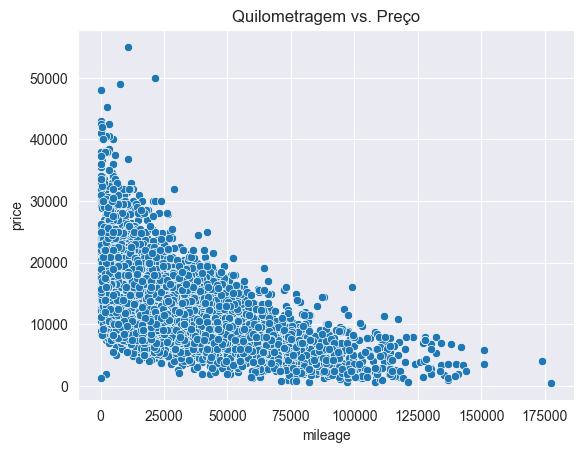

In [90]:
sns.scatterplot(data=df_clean, x='mileage', y='price')
plt.title('Quilometragem vs. Preço')
plt.show()

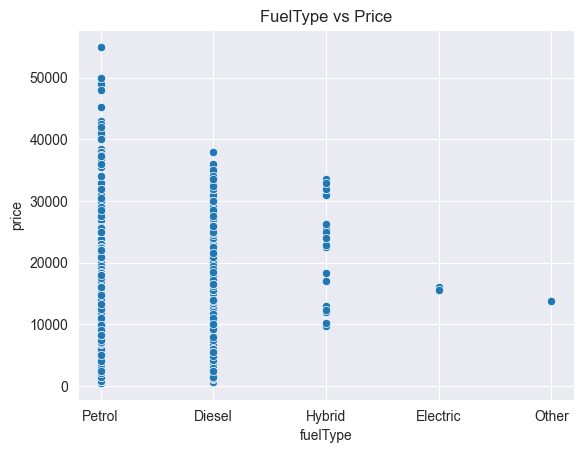

In [91]:
sns.scatterplot(data=df_clean, x='fuelType', y='price')
plt.title('FuelType vs Price')
plt.show()

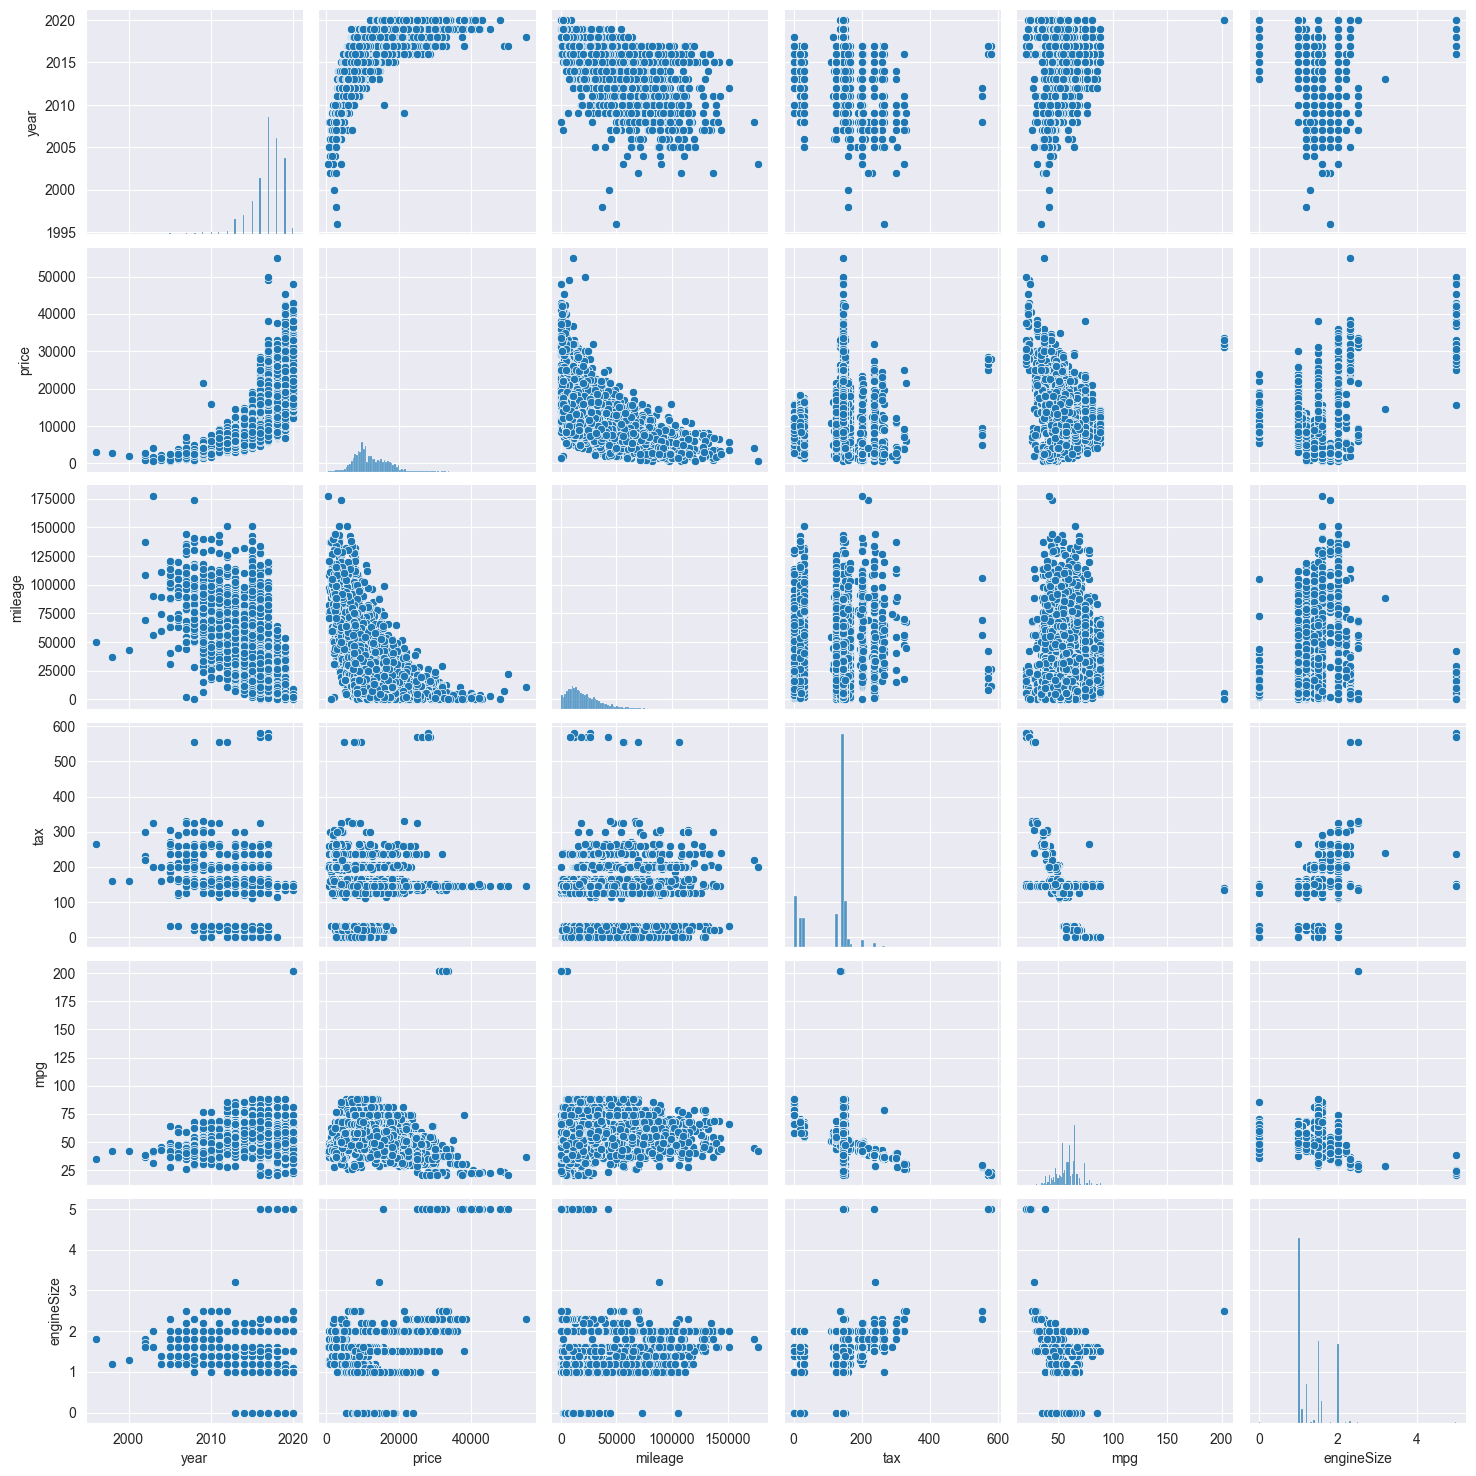

In [92]:
sns.pairplot(df_clean)
plt.show()

# OneHotEncoder
Troca a coluna "fuelType" por 4 colunas diferentes: "fuelType_Diesel", "fuelType_Petrol", "fuelType_Eletric", "fuelType_Other".
Agora dependendo do tipo do combustivel a coluna do tipo de combustivel fica a 1 e o resto fica a 0 e depois elimina a coluna original 

In [93]:
from sklearn.preprocessing import OneHotEncoder

FuelType_df = df_clean[["fuelType"]]
encoder = OneHotEncoder(dtype=int, sparse_output=False)
encoder_data = encoder.fit_transform(FuelType_df)
encoder_df = pd.DataFrame(encoder_data, columns=encoder.get_feature_names_out(['fuelType']))

df_clean = pd.concat([df_clean, encoder_df], axis=1) 
df_clean = df_clean.loc[:, ~df_clean.columns.duplicated()]

if 'fuelType_nan' in df_clean.columns:
    df_clean.drop(['fuelType_nan'], axis=1, inplace=True)
    
if 'fuelType' in df_clean.columns:
    df_clean.drop(['fuelType'], axis=1, inplace=True)
    
print(df_clean.head())

     model    year    price transmission  mileage    tax   mpg  engineSize  \
0   Fiesta  2017.0  12000.0    Automatic  15944.0  150.0  57.7         1.0   
1    Focus  2018.0  14000.0       Manual   9083.0  150.0  57.7         1.0   
2    Focus  2017.0  13000.0       Manual  12456.0  150.0  57.7         1.0   
3   Fiesta  2019.0  17500.0       Manual  10460.0  145.0  40.3         1.5   
4   Fiesta  2019.0  16500.0    Automatic   1482.0  145.0  48.7         1.0   

   fuelType_Diesel  fuelType_Electric  fuelType_Hybrid  fuelType_Other  \
0              0.0                0.0              0.0             0.0   
1              0.0                0.0              0.0             0.0   
2              0.0                0.0              0.0             0.0   
3              0.0                0.0              0.0             0.0   
4              0.0                0.0              0.0             0.0   

   fuelType_Petrol  
0              1.0  
1              1.0  
2              1.0  
3 

In [96]:
# Se existir, crie o OneHotEncoder
Transmission_df = df_clean[["transmission"]]
encoder = OneHotEncoder(dtype=int, sparse_output=False)
encoder_data = encoder.fit_transform(Transmission_df)
encoder_df = pd.DataFrame(encoder_data, columns=encoder.get_feature_names_out(['transmission']))
# Adicione ao DataFrame principal e remova colunas duplicadas
df_clean = pd.concat([df_clean, encoder_df], axis=1)
df_clean = df_clean.loc[:, ~df_clean.columns.duplicated()]

if 'transmission_nan' in df_clean.columns:
    df_clean.drop(['transmission_nan'], axis=1, inplace=True)
    
if 'transmission' in df_clean.columns:
    df_clean.drop(['transmission'], axis=1, inplace=True)
    
# Exibir resultado para confirmar
print(df_clean.head())
   

     model    year    price  mileage    tax   mpg  engineSize  \
0   Fiesta  2017.0  12000.0  15944.0  150.0  57.7         1.0   
1    Focus  2018.0  14000.0   9083.0  150.0  57.7         1.0   
2    Focus  2017.0  13000.0  12456.0  150.0  57.7         1.0   
3   Fiesta  2019.0  17500.0  10460.0  145.0  40.3         1.5   
4   Fiesta  2019.0  16500.0   1482.0  145.0  48.7         1.0   

   fuelType_Diesel  fuelType_Electric  fuelType_Hybrid  fuelType_Other  \
0              0.0                0.0              0.0             0.0   
1              0.0                0.0              0.0             0.0   
2              0.0                0.0              0.0             0.0   
3              0.0                0.0              0.0             0.0   
4              0.0                0.0              0.0             0.0   

   fuelType_Petrol  transmission_Automatic  transmission_Manual  \
0              1.0                       1                    0   
1              1.0            